In [1]:
from utils import plot_gaussian_dist

In [29]:
import numpy as np

In [77]:
sample = np.random.randint(0, 6, 100000) + 1

In [103]:
np.random.choice(
    ['A', 'B', 'C', 'D', 'E', 'F'],
    # size=1000,
    # replace=True,
    p=[0, 0, 0, 0, 0, 1]
)

np.str_('F')

In [84]:
sum([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])

1.0

In [78]:
from collections import Counter

In [79]:
Counter(sample)

Counter({np.int64(4): 16783,
         np.int64(2): 16736,
         np.int64(3): 16639,
         np.int64(1): 16634,
         np.int64(6): 16614,
         np.int64(5): 16594})

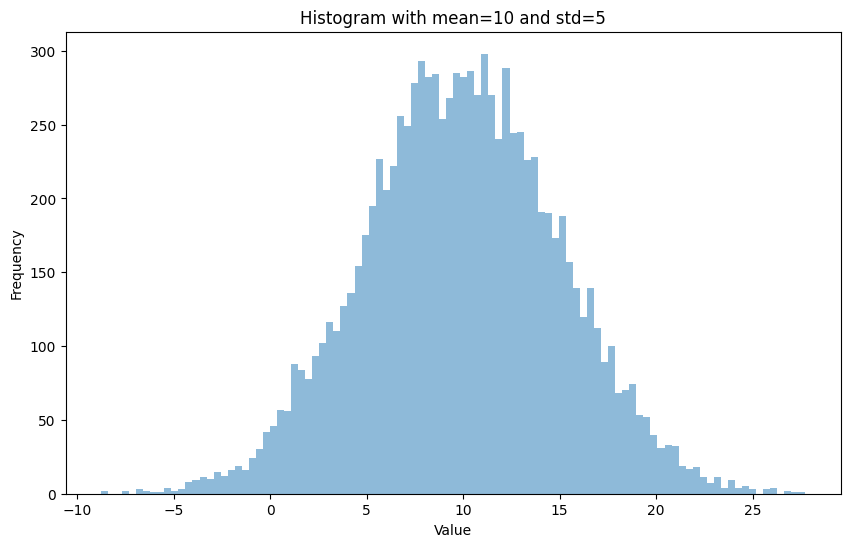

In [34]:
plot_gaussian_dist(10, 5, 100, 10_000);

In [4]:
import pandas as pd

In [7]:
df_pa = pd.read_csv("data/alturas-pesos-mils-train.csv").drop(columns=["Unnamed: 0"])

In [11]:
df_pa.head()

,Genero,Peso,Altura
0,Mujer,61.235,162.402
1,Hombre,97.432,181.908
2,Hombre,73.324,172.459
3,Mujer,55.193,157.748
4,Mujer,56.886,151.798


In [17]:
df_pa['Genero'] == 'Mujer'

0        True
1       False
2       False
3        True
4        True
        ...  
7995     True
7996    False
7997    False
7998     True
7999    False
Name: Genero, Length: 8000, dtype: bool

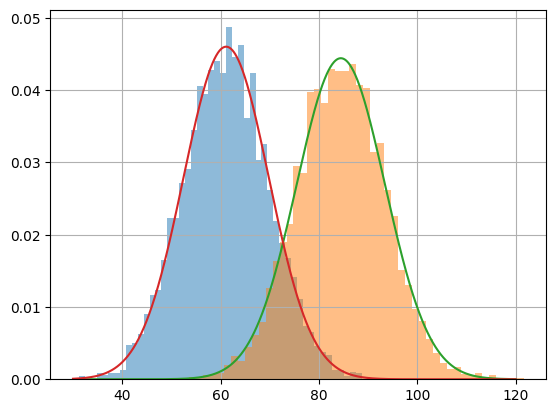

In [131]:
from matplotlib import pyplot as plt
from scipy.stats import norm

p_peso__mujer = df_pa[df_pa['Genero'] == 'Mujer']['Peso']
p_peso__hombre = df_pa[df_pa['Genero'] == 'Hombre']['Peso']
p_peso__mujer.hist(bins=50, density=True, alpha=0.5, label='Mujer')
p_peso__hombre.hist(bins=50, density=True, alpha=0.5, label='Hombre')
x = np.linspace(30, 120, 1000)

def pdf(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

pdf_out = pdf(x, p_peso__hombre.mean(), p_peso__hombre.std())
plt.plot(x, pdf_out)
pdf_out = pdf(x, p_peso__mujer.mean(), p_peso__mujer.std())
plt.plot(x, pdf_out)

In [132]:
from sklearn.mixture import GaussianMixture

In [133]:
gm = GaussianMixture(2)

In [143]:
gm.fit(df_pa[['Peso']])

,n_components,2
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


In [146]:
gm.means_

array([[61.01726102],
       [84.4753191 ]])

In [147]:
gm.covariances_

array([[[73.19760971]],

       [[79.34914386]]])

In [148]:
p_peso__mujer.var()

np.float64(75.19882926942155)

In [149]:
p_peso__hombre.var()

np.float64(80.69463867155831)